# Phase 3: Data Analytics & Insight Discovery
**Project:** IBM HR Analytics - Attrition Analysis  
**Goal:** Extract key business insights and prepare data for Power BI Dashboard.  

---
### Objectives:
1. Load the cleaned dataset from the automated pipeline.
2. Perform Descriptive Statistics to understand employee demographics.
3. Analyze Attrition Rate based on key variables (Department, Gender, Business Travel).
4. Identify correlations between variables (e.g., Monthly Income vs. Attrition).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# Load the cleaned data from the processed folder
DATA_PATH = '../data/processed/HR_Attrition_Cleaned.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print("✅ Success: Cleaned dataset loaded.")
    print(f"Dataset Shape: {df.shape}")
except FileNotFoundError:
    print("❌ Error: Cleaned file not found. Please run the Stage 2 pipeline first.")

✅ Success: Cleaned dataset loaded.
Dataset Shape: (1470, 33)


In [2]:
# Analysis: Which department has the highest turnover?
dept_attrition = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False) * 100

print("--- Attrition Rate by Department (%) ---")
print(dept_attrition)

# Analysis: Job Satisfaction vs Attrition
satisfaction_attrition = df.groupby('JobSatisfaction')['Attrition'].mean() * 100
print("\n--- Attrition Rate by Job Satisfaction (1-4) ---")
print(satisfaction_attrition)

--- Attrition Rate by Department (%) ---
Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64

--- Attrition Rate by Job Satisfaction (1-4) ---
JobSatisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: Attrition, dtype: float64


In [3]:
# Analysis: Which department has the highest turnover?
dept_attrition = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False) * 100

print("--- Attrition Rate by Department (%) ---")
print(dept_attrition)

# Analysis: Job Satisfaction vs Attrition
satisfaction_attrition = df.groupby('JobSatisfaction')['Attrition'].mean() * 100
print("\n--- Attrition Rate by Job Satisfaction (1-4) ---")
print(satisfaction_attrition)


--- Attrition Rate by Department (%) ---
Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64

--- Attrition Rate by Job Satisfaction (1-4) ---
JobSatisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: Attrition, dtype: float64


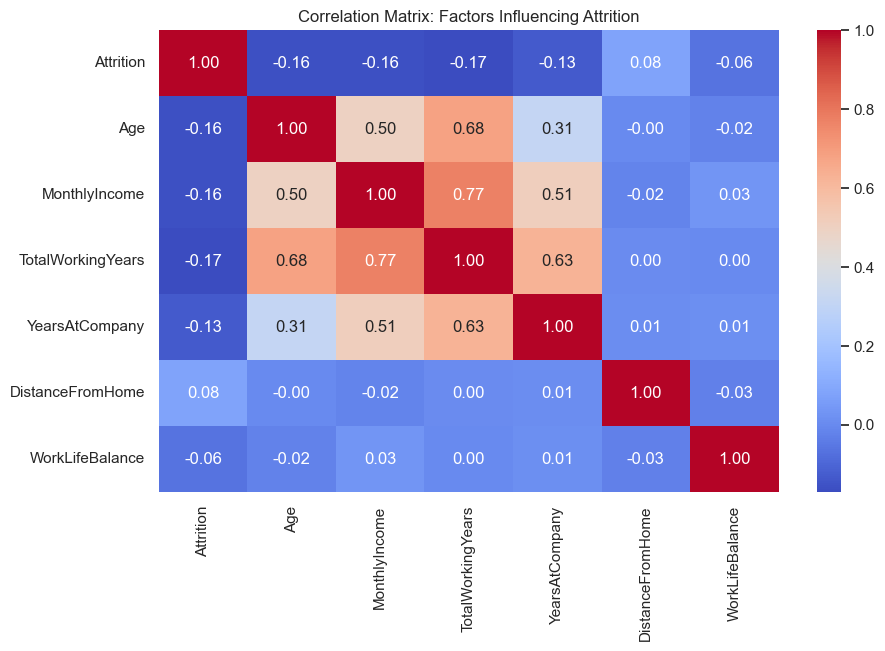

💡 Insight: Look for negative correlations with Attrition (e.g., MonthlyIncome).


In [4]:
# Selecting key numerical columns for correlation analysis
cols_for_corr = [
    'Attrition', 'Age', 'MonthlyIncome', 'TotalWorkingYears', 
    'YearsAtCompany', 'DistanceFromHome', 'WorkLifeBalance'
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[cols_for_corr].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Factors Influencing Attrition')
plt.show()

print("💡 Insight: Look for negative correlations with Attrition (e.g., MonthlyIncome).")

In [5]:
# Final check before dashboarding
# Ensure all feature engineering is intact
print("--- Final Columns for Dashboard ---")
print(df.columns.tolist())

# Export as the final gold standard dataset
FINAL_EXPORT_PATH = '../data/processed/HR_Final_Dashboard_Data.csv'
df.to_csv(FINAL_EXPORT_PATH, index=False)

print(f"\n✨ SUCCESS: Final enriched data is ready for Power BI at: {FINAL_EXPORT_PATH}")

--- Final Columns for Dashboard ---
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AgeGroup', 'DistanceGroup']

✨ SUCCESS: Final enriched data is ready for Power BI at: ../data/processed/HR_Final_Dashboard_Data.csv
